# Bahrain Race

In [1]:
import numpy as np
import fastf1 as ff1
import fastf1.plotting
import pandas as pd
import matplotlib.pyplot as plt
from fastf1.core import Laps
from timple.timedelta import strftimedelta

ff1.plotting.setup_mpl(misc_mpl_mods=False)
import sys
sys.path.insert(0, "../")
from settings import CACHE_FOLDER_PATH
from utlis import *
setup_cache(CACHE_FOLDER_PATH)

CACHE_FOLDER_PATH: /Users/riccardoviscio1/Desktop/Projects/F1 Data Analysis/season_2024/f1_cache


In [2]:
session = ff1.get_session(2024, 'Bahrain', 'R')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.2]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


KeyboardInterrupt: 

## It's Race Day!!

![Bahrain Circuit](https://media.formula1.com/image/upload/content/dam/fom-website/2018-redesign-assets/Circuit%20maps%2016x9/Bahrain_Circuit.png.transform/9col-retina/image.png)


As we've already seen, this is the Bahrain racetrack, known for its stunning architecture and challenging layout. With its long straights and tight corners, it provides a thrilling experience for both drivers and spectators alike. So lets dive into the Data to gain a better insight. 

In [ ]:
from fastf1 import utils 

In [ ]:
# Starting Grid
session.results[['DriverNumber', 'BroadcastName']]

,DriverNumber,BroadcastName
1,1,M VERSTAPPEN
11,11,S PEREZ
55,55,C SAINZ
16,16,C LECLERC
63,63,G RUSSELL
4,4,L NORRIS
44,44,L HAMILTON
81,81,O PIASTRI
14,14,F ALONSO
18,18,L STROLL


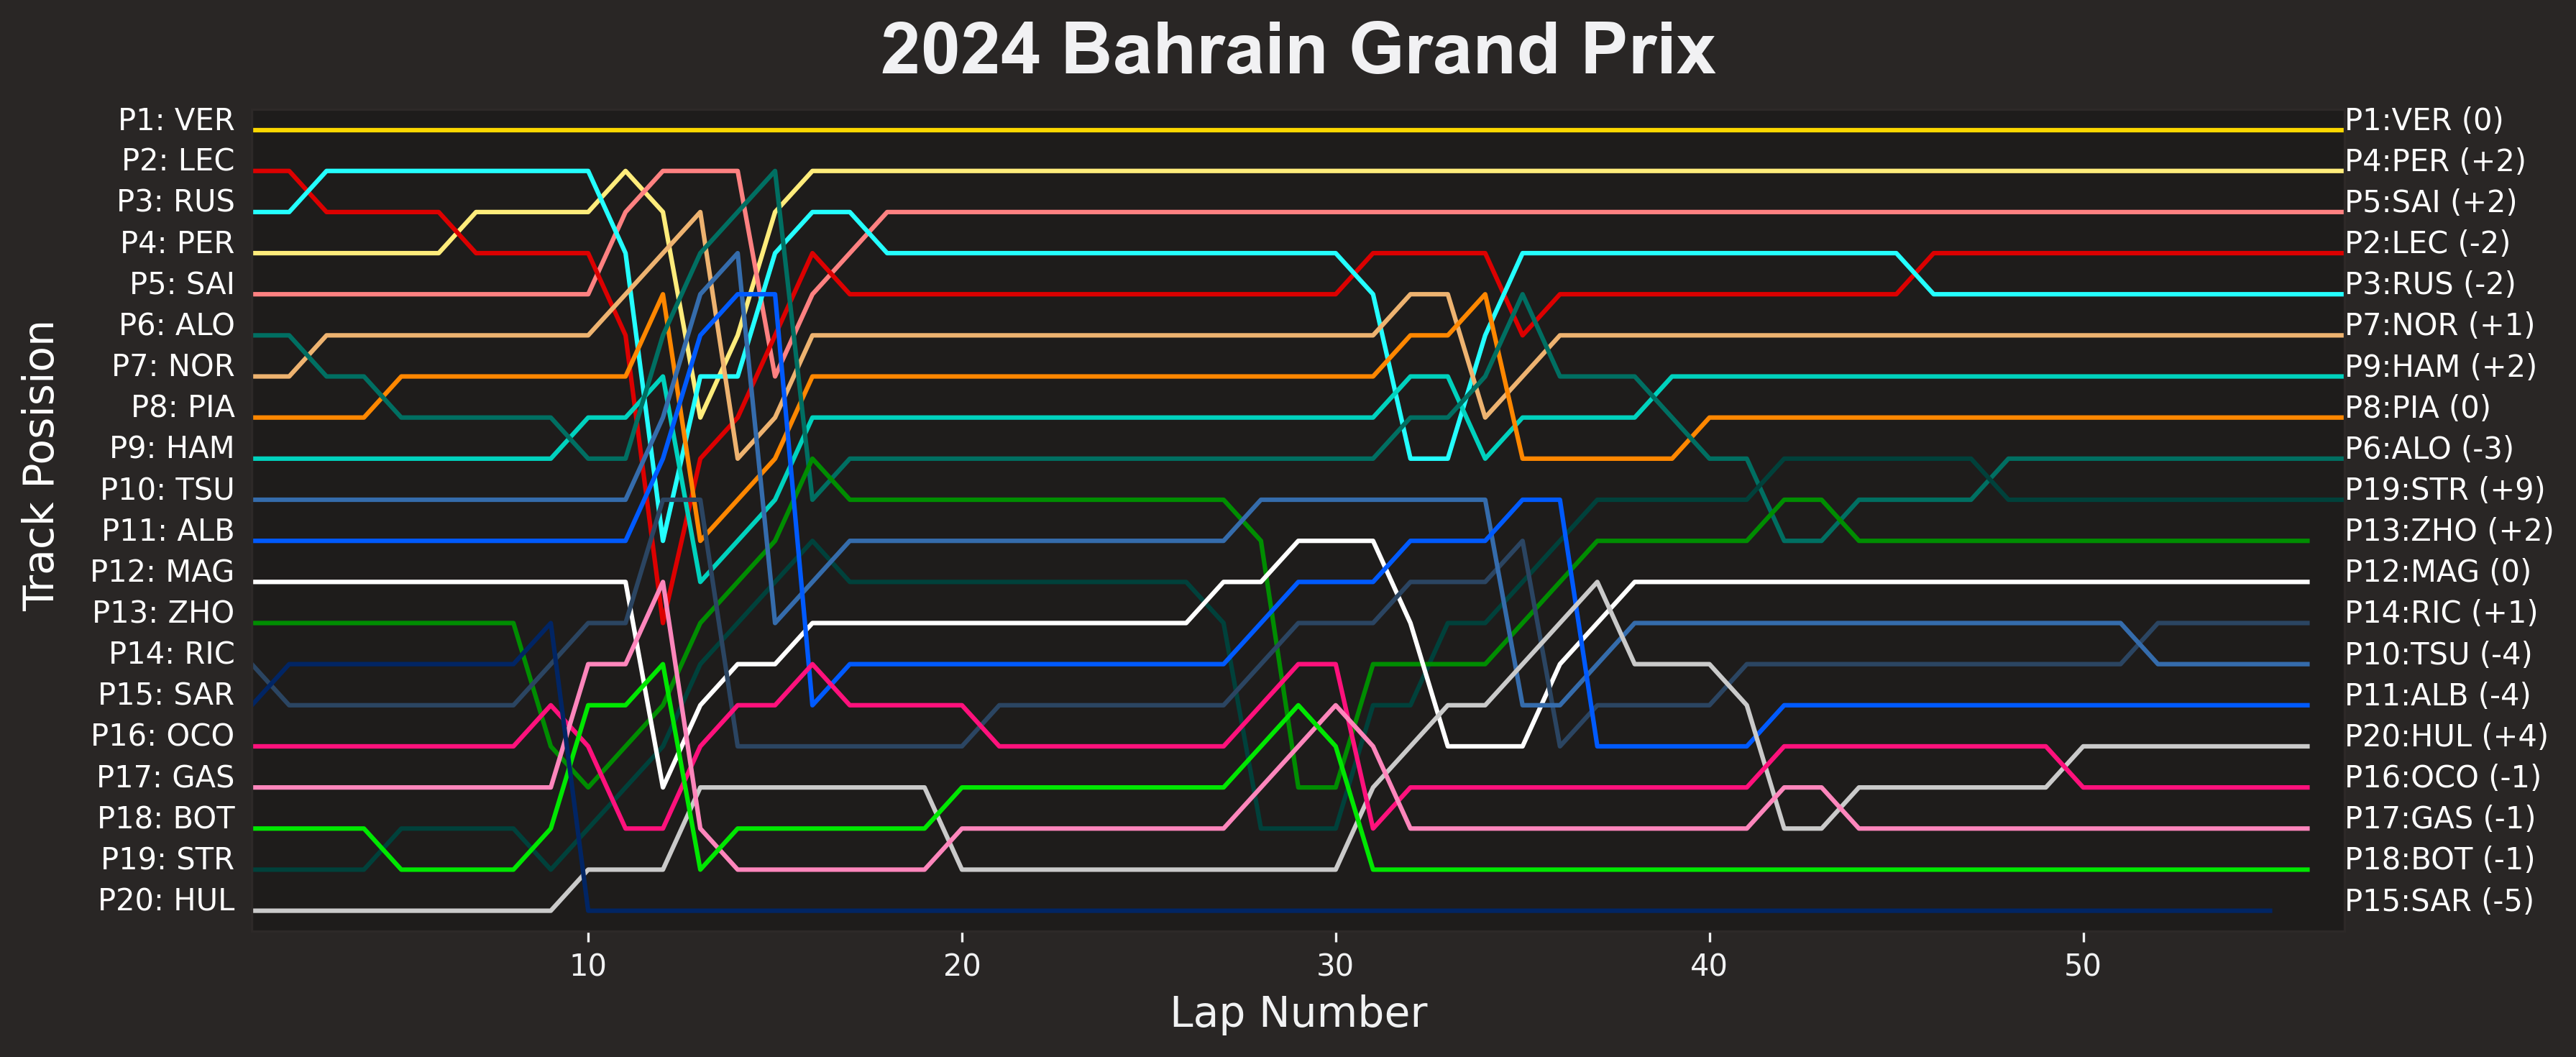

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5), dpi = 300)
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = ff1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)
    
for drv in session.drivers:
        drv_laps = session.laps.pick_driver(drv)
        abb = drv_laps['Driver'].iloc[0]
        starting_position = int(drv_laps['Position'].iloc[0])
        ax.text(0.8, drv_laps['Position'].iloc[0], f"P{starting_position}: {abb} ", color='w', ha='right')
    
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)
    abb = drv_laps['Driver'].iloc[0]
    final_position = drv_laps['Position'].iloc[-1]
    starting_position = int(drv_laps['Position'].iloc[0])
    places_gained = int(starting_position - final_position)
    places_text =  f"({'+' if places_gained > 0 else '' if places_gained == 0 else '-'}{abs(places_gained)})"
    ax.text(57, final_position, f"P{starting_position}:{abb} {places_text}", color='w', ha='left') 

        
ax.annotate('Track Posision', xy=(-0.11, 0.4), xycoords='axes fraction', fontsize=14, color='w', rotation = 90)


ax.set_ylim([20.5, 0.5])
ax.set_yticks([])
ax.set_xlabel('Lap Number', fontsize = 14)
ax.set_xlim([1,57])
plt.title('2024 Bahrain Grand Prix', font = 'Arial', fontweight = 'bold', fontsize = 24)
plt.tight_layout()

plt.show()

In [ ]:
import seaborn as sns

DataNotLoadedError: The data you are trying to access has not been loaded yet. See `Session.load`

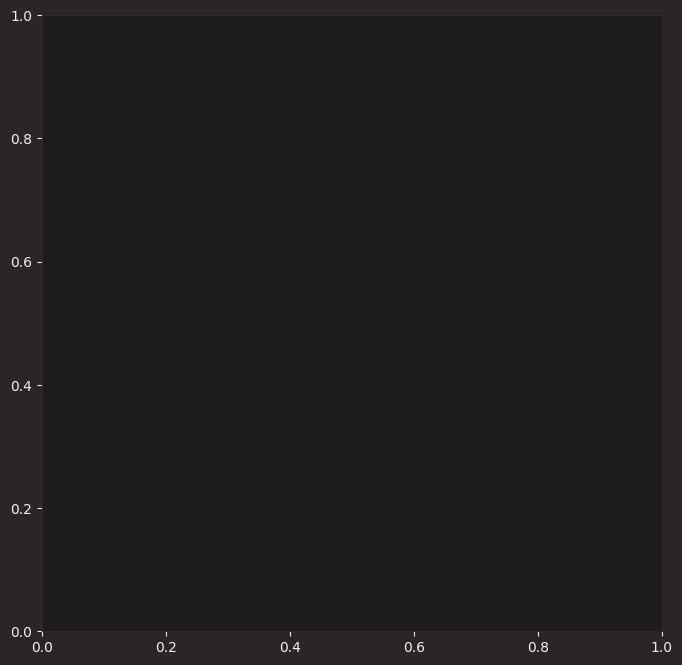

In [ ]:


# Function to calculate cumulative delta
def calculate_cumulative_delta(driver_laps, reference_driver_index):
    cumulative_delta = []
    reference_lap_times = driver_laps.iloc[reference_driver_index]['LapTime']
    for i in range(len(driver_laps)):
        if i != reference_driver_index:
            drv_lap_times = driver_laps.iloc[i]['LapTime']
            delta = [drv_lap_times[j] - reference_lap_times[j] for j in range(len(drv_lap_times))]
            cumulative_delta.append([sum(delta[:n+1]) for n in range(len(delta))])
    return cumulative_delta


# Create a scatter plot of lap times for each driver
fig, ax = plt.subplots(figsize=(8, 8))

# Create a dictionary to store colors for each driver
driver_colors = {}
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)
    abb = drv_laps['Driver'].iloc[0]  # Using the driver abbreviation obtained from the session data
    color = fastf1.plotting.driver_color(abb)
    driver_colors[drv] = color

# Plot lap times and cumulative delta for each driver
for i, drv in enumerate(session.drivers):
    driver_laps = session.laps.pick_driver(drv)
    color = driver_colors[drv]
    sns.scatterplot(data=driver_laps,
                    x="LapNumber",
                    y="LapTime",
                    hue="Compound",
                    palette=fastf1.plotting.COMPOUND_COLORS,
                    s=80,
                    linewidth=0,
                    legend=False,
                    ax=ax)
    sns.lineplot(data=driver_laps,
                 x="LapNumber",
                 y="LapTime",
                 color=color,
                 linewidth=1,
                 ax=ax)
    
    # Calculate cumulative delta relative to the first driver
    cumulative_delta = calculate_cumulative_delta(driver_laps, i)
    
    # Plot cumulative delta
    for delta in cumulative_delta:
        sns.lineplot(data=driver_laps,
                     x="LapNumber",
                     y=delta,
                     color=color,
                     linewidth=1,
                     alpha=0.5,  # Adjust transparency for better visualization
                     ax=ax)

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()

plt.suptitle("Laptimes and Cumulative Delta for Each Driver in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


In [ ]:
driver_colors = {}
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)
    abb = drv_laps['Driver'].iloc[0]  # Using the driver abbreviation obtained from the session data
    color = fastf1.plotting.driver_color(abb)
    driver_colors[drv] = color
# Create a scatter plot of lap times for each driver
fig, ax = plt.subplots(figsize=(8, 8))

# Create a dictionary to store colors for each driver
driver_colors = {}
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)
    abb = drv_laps['Driver'].iloc[0]  # Using the driver abbreviation obtained from the session data
    color = fastf1.plotting.driver_color(abb)
    driver_colors[drv] = color

# Plot lap times and cumulative delta for each driver
for drv in session.drivers:
    driver_laps = session.laps.pick_driver(drv)
    color = driver_colors[drv]
    sns.scatterplot(data=driver_laps,
                    x="LapNumber",
                    y="LapTime",
                    hue="Compound",
                    palette=fastf1.plotting.COMPOUND_COLORS,
                    s=80,
                    linewidth=0,
                    legend=False,
                    ax=ax)
    sns.lineplot(data=driver_laps,
                 x="LapNumber",
                 y="LapTime",
                 color=color,
                 linewidth=1,
                 ax=ax)
    
    # Calculate cumulative delta relative to the first driver
    reference_driver = session.drivers[0]
    cumulative_delta = calculate_cumulative_delta(driver_laps, reference_driver)
    
    # Plot cumulative delta
    for i, delta in enumerate(cumulative_delta):
        sns.lineplot(data=driver_laps,
                     x="LapNumber",
                     y=delta,
                     color=color,
                     linewidth=1,
                     alpha=0.5,  # Adjust transparency for better visualization
                     ax=ax)

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()

plt.suptitle("Laptimes and Cumulative Delta for Each Driver in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


DataNotLoadedError: The data you are trying to access has not been loaded yet. See `Session.load`

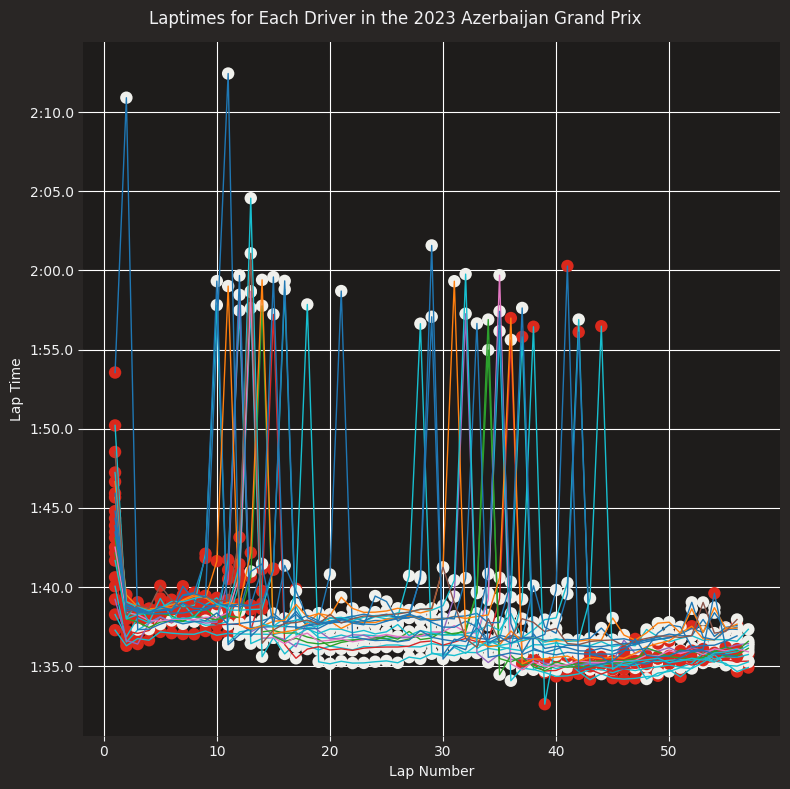

In [ ]:

driver_colors = {}
for drv in session.drivers:
    abb = drv[:3]  # Using the first three characters of the driver abbreviation
    driver_colors[drv] = sns.color_palette("tab10")[ord(abb[0]) % 10]  # Assigning color based on ASCII value of first character

# Create a scatter plot of lap times for each driver
fig, ax = plt.subplots(figsize=(8, 8))
for drv in session.drivers:
    driver_laps = session.laps.pick_driver(drv)
    color = driver_colors[drv]
    sns.scatterplot(data=driver_laps,
                    x="LapNumber",
                    y="LapTime",
                    hue="Compound",
                    palette=fastf1.plotting.COMPOUND_COLORS,
                    s=80,
                    linewidth=0,
                    legend=False,
                    ax=ax)
    sns.lineplot(data=driver_laps,
                 x="LapNumber",
                 y="LapTime",
                 color=color,
                 linewidth=1,
                 ax=ax)

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()

plt.suptitle("Laptimes for Each Driver in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


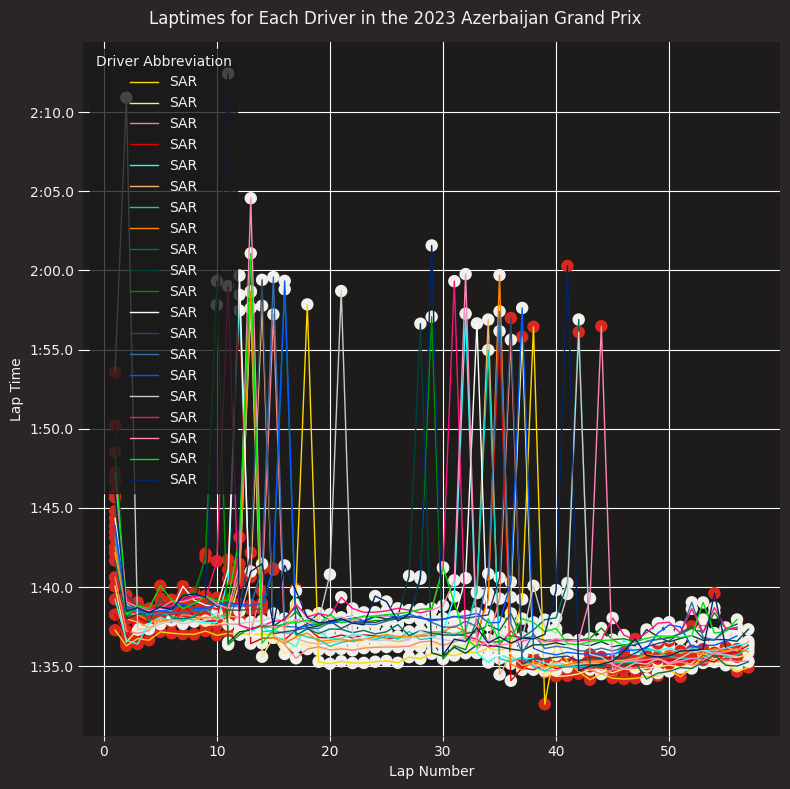

In [ ]:

# Create a custom color palette based on driver abbreviation
driver_colors = {}
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)
    abb = drv_laps['Driver'].iloc[0]  # Abbreviation from the session data
    color = fastf1.plotting.driver_color(abb)  # Color based on the abbreviation
    driver_colors[drv] = color

# Create a scatter plot of lap times for each driver
fig, ax = plt.subplots(figsize=(8, 8))
legend_handles = []  # Initialize list to store legend handles
legend_labels = []   # Initialize list to store legend labels
for drv in session.drivers:
    driver_laps = session.laps.pick_driver(drv)
    color = driver_colors[drv]
    sns.scatterplot(data=driver_laps,
                    x="LapNumber",
                    y="LapTime",
                    hue="Compound",
                    palette=fastf1.plotting.COMPOUND_COLORS,
                    s=80,
                    linewidth=0,
                    legend=False,
                    ax=ax)
    sns.lineplot(data=driver_laps,
                 x="LapNumber",
                 y="LapTime",
                 color=color,
                 linewidth=1,
                 ax=ax)
    
    # Append driver abbreviation and corresponding color to legend lists
    legend_handles.append(plt.Line2D([0], [0], color=color, linewidth=1))
    legend_labels.append(abb)  # Using the abbreviation obtained from the session data

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()

plt.suptitle("Laptimes for Each Driver in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

# Create custom legend
ax.legend(legend_handles, legend_labels, title="Driver Abbreviation", loc="upper left")

plt.tight_layout()
plt.show()
